# SGDを用いたクラス分類

START→データが50以上→カテゴリーデータ→ラベルありデータ→データ数10万以上→「SGD」

## 問題設定
１７８本のワインのデータ(色、プロリン)を使用して、未知のワインが３つのブドウ品種のどれから作られたかを識別する.

## データ
1. ラベル：0, 1, 2（ブドウの品種）
2. データ：178（ワインの数）
3. 変数1：ワインの色
4. 変数2：ワインに含まれるプロリンの量

## 元ネタ
<http://neuro-educator.com/mlearn1/>
<http://scikit-learn.org/stable/modules/sgd.html#classification>
<http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier>

The attributes are (dontated by Riccardo Leardi,  riclea@anchem.unige.it )

0. Kind of grape
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline            

In [1]:
# 解説 1：ライブラリのインポート--------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 機械学習用のライブラリを利用
from sklearn import linear_model, metrics, preprocessing, model_selection
# 学習結果をプロットする外部ライブラリを利用
from mlxtend.plotting import plot_decision_regions 

In [2]:
%matplotlib inline

In [3]:
# 解説 2：Wineのデータセットを読み込む--------------------------------
df_wine_all = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
    header=None)

In [4]:
df_wine_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df_wine_all.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# 品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0, 10, 13]]
df_wine.columns = ['class', 'color', 'proline']
df_wine

,class,color,proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735
...,...,...,...
173,3,7.70,740
174,3,7.30,750
175,3,10.20,835
176,3,9.30,840


In [7]:
df_wine.describe()

,class,color,proline
count,178.000000,178.000000,178.000000
mean,1.938202,5.058090,746.893258
std,0.775035,2.318286,314.907474
min,1.000000,1.280000,278.000000
25%,1.000000,3.220000,500.500000
50%,2.000000,4.690000,673.500000
75%,3.000000,6.200000,985.000000
max,3.000000,13.000000,1680.000000


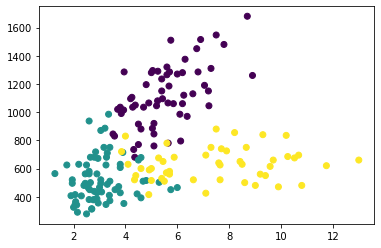

In [8]:
# 解説 3：プロットしてみる------------------------------------------------------
x = df_wine["color"]
y = df_wine["proline"]
z = df_wine["class"] - 1
plt.scatter(x, y, c=z)

In [9]:
# 解説 4：データの整形-------------------------------------------------------
# データの正規化
X = df_wine[["color", "proline"]]
sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_std.shape

(178, 2)

In [10]:
X_std

array([[ 0.25171685,  1.01300893],
       [-0.29332133,  0.96524152],
       [ 0.26901965,  1.39514818],
       [ 1.18606801,  2.33457383],
       [-0.31927553, -0.03787401],
       [ 0.73186953,  2.23903902],
       [ 0.08301456,  1.72952002],
       [-0.00349944,  1.74544249],
       [ 0.06138606,  0.94931905],
       [ 0.93517742,  0.94931905],
       [ 0.29929955,  2.43010864],
       [-0.02512794,  1.69767508],
       [ 0.23441405,  1.82505483],
       [ 0.14790005,  1.28369089],
       [ 1.05629702,  2.54793491],
       [ 0.96978302,  1.79320989],
       [ 0.49395604,  1.69767508],
       [ 0.66698403,  1.22000102],
       [ 1.575381  ,  2.97147258],
       [ 0.01812906,  0.3124203 ],
       [ 0.25604255,  0.10542821],
       [-0.24141293,  0.07358327],
       [-0.54421192,  0.91747411],
       [-0.48797782,  0.85378424],
       [-0.66533151,  0.3124203 ],
       [-0.63937732,  0.2646529 ],
       [-0.11164194,  1.42699311],
       [-0.47932642,  1.71359755],
       [-0.24141293,

In [11]:
# 解説 5：機械学習で分類する---------------------------------------------------
# loss="hinge", loss="log"
# 基本的にはhinge関数でよい。log関数にすれば、識別確率を求めることができる。
clf_result = linear_model.SGDClassifier(loss="hinge") 

In [12]:
# 解説 6：K分割交差検証（cross validation）で性能を評価する---------------------
scores = model_selection.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.8663398692810457
正解率の標準偏差 =  0.0966066357414934


In [13]:
scores

array([0.77777778, 0.77777778, 0.66666667, 0.83333333, 0.88888889,
       0.94444444, 0.88888889, 0.94444444, 0.94117647, 1.        ])

In [14]:
# 解説 7：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label = model_selection.train_test_split(X_std,
                                                                            z,
                                                                            test_size=0.1,
                                                                            random_state=0)
clf_result.fit(X_train, train_label)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
# 正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

正答率 =  0.8333333333333334


In [16]:
# plotデータの準備
X_train_plot = np.vstack(X_train)
train_label_plot = np.hstack(train_label)
X_test_plot = np.vstack(X_test)
test_label_plot = np.hstack(test_label)

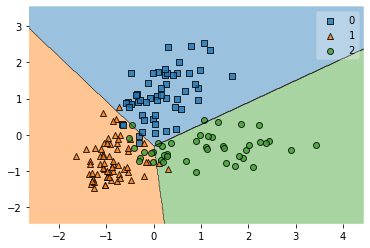

In [17]:
# 学習データをプロット
plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01)

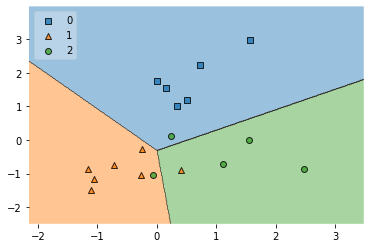

In [18]:
# テストデータをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2)

In [19]:
# 解説 8：任意のデータに対する識別結果を見てみる------------------
predicted_label = clf_result.predict([[3, 3]])
print("このテストデータのラベル = ", predicted_label)

このテストデータのラベル =  [0]


In [20]:
# 解説 9：識別平面の式を手に入れる--------------------------------
print(clf_result.intercept_)
print(clf_result.coef_ )  # coef[0]*x + coef[1]*y + intercept = 0

[-1.9239473  -6.5572406  -5.85555006]
[[ -2.17474727   8.184355  ]
 [-20.78606068  -6.89386098]
 [  5.31711102  -4.15422884]]
